<a href="https://colab.research.google.com/github/GitTanish/DataAnalysis/blob/main/anomaly_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update && apt-get install gdal-bin -y

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://cli.github.com/packages stable/main amd64 Packages [346 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,006 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backport

In [2]:
# 1. Install PyTorch with CUDA support
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# 2. Install the GDAL system library
!apt-get update && apt-get install gdal-bin -y

# 3. Install the required Python packages, forcing rasterio to reinstall
#    with the correct GDAL version.
!pip install --force-reinstall rasterio numpy matplotlib scikit-learn gdal==$(gdal-config --version)

Looking in indexes: https://download.pytorch.org/whl/cu118
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem 

In [3]:
!pip install --force-reinstall rasterio "numpy==1.26.4" matplotlib scikit-learn gdal==$(gdal-config --version)

  Using cached rasterio-1.4.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.3 MB/s eta 0:00:00
  Using cached matplotlib-3.10.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached GDAL-3.8.4-cp312-cp312-linux_x86_64.whl
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached click_plugins-1.1.1.2-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached pyparsing-3.2.4-py3-none-any.whl.metadata (5.0 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x

In [2]:
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [1]:
!apt-get update && apt-get install gdal-bin -y

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [2]:
import torch
import numpy as np
import rasterio
from rasterio.transform import from_origin
import gc

# Set the device to CUDA if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# If a GPU is available, print its details
if torch.cuda.is_available():
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
    print(f"GPU VRAM: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

# Clear any cached memory from previous runs
torch.cuda.empty_cache()
gc.collect()

Using device: cuda
GPU name: Tesla T4
GPU VRAM: 15.8 GB


123

In [3]:
width_km = 30
height_km = 30
resolution_m = 10
n_bands = 150
width_px = int(width_km * 1000 / resolution_m)
height_px = int(height_km * 1000 / resolution_m)

print(f"Generating image: {width_px} x {height_px} x {n_bands} band-by-band to avoid RAM crash.")

# --- Define the anomaly properties beforehand ---
np.random.seed(42)
anomaly_center_x, anomaly_center_y = 1500, 1500
radius = 50
y_coords, x_coords = np.ogrid[:height_px, :width_px]
# Create a 2D boolean mask for the anomaly location
anomaly_mask = (x_coords - anomaly_center_x)**2 + (y_coords - anomaly_center_y)**2 < radius**2

# Define the geotransform and CRS for the output file
transform = from_origin(-15000, 15000, resolution_m, resolution_m)
crs = 'EPSG:32633'

# --- Open the file in write mode and write one band at a time ---
with rasterio.open(
    'synthetic_hyperspectral.tif',
    'w',
    driver='GTiff',
    height=height_px,
    width=width_px,
    count=n_bands,
    dtype=np.float32,
    transform=transform,
    crs=crs
) as dst:
    for i in range(1, n_bands + 1):
        # Generate ONLY ONE band in memory (~36 MB)
        band_data = np.random.rand(height_px, width_px).astype(np.float32)

        # Add the anomaly to this band using the pre-computed mask
        band_data[anomaly_mask] += 1.8

        # Write this single band to its corresponding index in the file
        dst.write(band_data, i)

        # The 'band_data' variable is overwritten in the next loop, releasing memory
        if i % 10 == 0:
            print(f"  ... Wrote band {i}/{n_bands}")

gc.collect() # Clean up memory just in case

print("\n✅ Hyperspectral image saved to disk safely.")
print("✅ Peak RAM usage was extremely low. The rest of the pipeline will now work.")

Generating image: 3000 x 3000 x 150 band-by-band to avoid RAM crash.
  ... Wrote band 10/150
  ... Wrote band 20/150
  ... Wrote band 30/150
  ... Wrote band 40/150
  ... Wrote band 50/150
  ... Wrote band 60/150
  ... Wrote band 70/150
  ... Wrote band 80/150
  ... Wrote band 90/150
  ... Wrote band 100/150
  ... Wrote band 110/150
  ... Wrote band 120/150
  ... Wrote band 130/150
  ... Wrote band 140/150
  ... Wrote band 150/150

✅ Hyperspectral image saved to disk safely.
✅ Peak RAM usage was extremely low. The rest of the pipeline will now work.


In [4]:
def extract_patches(filename, patch_size=128, stride=64):
    """
    Yields one patch at a time from the raster file, avoiding high memory usage.
    """
    with rasterio.open(filename) as src:
        height, width = src.height, src.width
        for y in range(0, height - patch_size + 1, stride):
            for x in range(0, width - patch_size + 1, stride):
                window = rasterio.windows.Window(x, y, patch_size, patch_size)
                patch = src.read(window=window)
                yield patch, (x, y)

# Test the generator safely
patch_gen = extract_patches('synthetic_hyperspectral.tif', 128, 64)
first_patch, coord = next(patch_gen)

print(f"Patch shape: {first_patch.shape}")
print(f"First patch at: {coord}")
print(f"Memory used by one patch: {first_patch.nbytes / 1e6:.1f} MB")

Patch shape: (150, 128, 128)
First patch at: (0, 0)
Memory used by one patch: 9.8 MB


In [5]:
import torch.nn as nn

class HyperspectralAutoencoder(nn.Module):
    def __init__(self, n_bands):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(n_bands, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(64, n_bands, 3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.decoder(self.encoder(x))

model = HyperspectralAutoencoder(n_bands=n_bands).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

print(f"✅ Model loaded to {device}")
print(f"Total parameters: {sum(p.numel() for p in model.parameters()):,}")

✅ Model loaded to cuda
Total parameters: 157,542


In [17]:
print("🚀 Training autoencoder on GPU...")

model.train()
epoch_loss = []

for epoch in range(3): # Training for 3 epochs
    total_loss = 0
    count = 0
    patch_gen = extract_patches('synthetic_hyperspectral.tif', 128, 64)

    for patch, _ in patch_gen:
        # Convert numpy patch to a PyTorch tensor and move to GPU
        x = torch.from_numpy(patch).float().unsqueeze(0).to(device) # Shape: [1, 150, 128, 128]

        # Forward pass
        y_pred = model(x)
        loss = criterion(y_pred, x)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        count += 1

        # Critical: Free memory after each patch
        del x, y_pred, loss
        torch.cuda.empty_cache()
        gc.collect()

        if count % 100 == 0:
            print(f"Epoch {epoch+1}, Batch {count}: Loss = {total_loss/count:.5f}")

    avg_loss = total_loss / count
    epoch_loss.append(avg_loss)
    print(f"Epoch [{epoch+1}/3] Avg Loss: {avg_loss:.5f}")

print("✅ Training complete.")

torch.save(model.state_dict(), 'hyperspectral_autoencoder.pth')
print("✅ Model weights saved to hyperspectral_autoencoder.pth")

🚀 Training autoencoder on GPU...
Epoch 1, Batch 100: Loss = 0.08335
Epoch 1, Batch 200: Loss = 0.08334
Epoch 1, Batch 300: Loss = 0.08333
Epoch 1, Batch 400: Loss = 0.08333
Epoch 1, Batch 500: Loss = 0.08333
Epoch 1, Batch 600: Loss = 0.08333
Epoch 1, Batch 700: Loss = 0.08333
Epoch 1, Batch 800: Loss = 0.08333
Epoch 1, Batch 900: Loss = 0.08333
Epoch 1, Batch 1000: Loss = 0.08382
Epoch 1, Batch 1100: Loss = 0.08868
Epoch 1, Batch 1200: Loss = 0.08847
Epoch 1, Batch 1300: Loss = 0.08807
Epoch 1, Batch 1400: Loss = 0.08773
Epoch 1, Batch 1500: Loss = 0.08744
Epoch 1, Batch 1600: Loss = 0.08718
Epoch 1, Batch 1700: Loss = 0.08695
Epoch 1, Batch 1800: Loss = 0.08675
Epoch 1, Batch 1900: Loss = 0.08657
Epoch 1, Batch 2000: Loss = 0.08641
Epoch [1/3] Avg Loss: 0.08637
Epoch 2, Batch 100: Loss = 0.08335
Epoch 2, Batch 200: Loss = 0.08334
Epoch 2, Batch 300: Loss = 0.08333
Epoch 2, Batch 400: Loss = 0.08333
Epoch 2, Batch 500: Loss = 0.08333
Epoch 2, Batch 600: Loss = 0.08333
Epoch 2, Batch 7

In [18]:
print("🔍 Computing anomaly map...")

model.eval()
anomaly_map = np.zeros((height_px, width_px), dtype=np.float32)
weight_map = np.zeros((height_px, width_px), dtype=np.float32)
patch_size = 128
stride = 64

with torch.no_grad():
    patch_count = 0
    for patch, (x, y) in extract_patches('synthetic_hyperspectral.tif', patch_size, stride):
        x_tensor = torch.from_numpy(patch).float().unsqueeze(0).to(device)
        recon = model(x_tensor)

        # Calculate reconstruction error (MSE) for the patch
        mse = torch.mean((recon - x_tensor)**2).item()

        # Add the error to the corresponding location in the anomaly map
        weight_patch = np.ones((patch_size, patch_size))
        anomaly_map[y:y+patch_size, x:x+patch_size] += mse * weight_patch
        weight_map[y:y+patch_size, x:x+patch_size] += weight_patch

        patch_count += 1
        if patch_count % 200 == 0:
            print(f"Processed {patch_count} patches...")

        # Clean up memory immediately
        del x_tensor, recon
        torch.cuda.empty_cache()
        gc.collect()

# Normalize the anomaly map where patches overlap
weight_map[weight_map == 0] = 1 # Avoid division by zero
anomaly_map /= weight_map

print("✅ Anomaly map computed.")

🔍 Computing anomaly map...
Processed 200 patches...
Processed 400 patches...
Processed 600 patches...
Processed 800 patches...
Processed 1000 patches...
Processed 1200 patches...
Processed 1400 patches...
Processed 1600 patches...
Processed 1800 patches...
Processed 2000 patches...
✅ Anomaly map computed.


In [19]:
with rasterio.open(
    'anomaly_map.tif',
    'w',
    driver='GTiff',
    height=height_px,
    width=width_px,
    count=1,
    dtype=np.float32,
    transform=transform,
    crs='EPSG:32633'
) as dst:
    dst.write(anomaly_map, 1)

print("💾 Saved anomaly_map.tif")

💾 Saved anomaly_map.tif


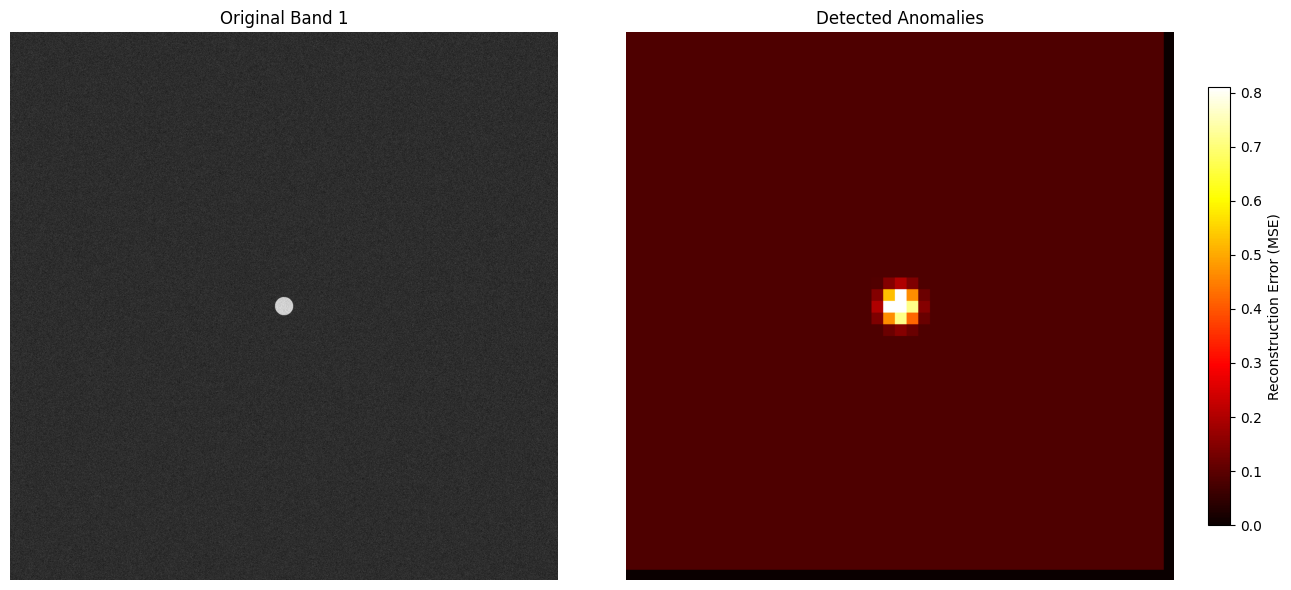

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Subplot 1: Display a single band from the original image
with rasterio.open('synthetic_hyperspectral.tif') as src:
    band1 = src.read(1) # Safely read only the first band
    plt.subplot(1, 2, 1)
    plt.imshow(band1, cmap='gray')
    plt.title("Original Band 1")
    plt.axis('off')

# Subplot 2: Display the computed anomaly map
plt.subplot(1, 2, 2)
# Use percentile to avoid extreme values skewing the color map
vmax = np.percentile(anomaly_map, 99.9)
plt.imshow(anomaly_map, cmap='hot', vmin=0, vmax=vmax)
plt.title("Detected Anomalies")
plt.axis('off')
plt.colorbar(shrink=0.8, label="Reconstruction Error (MSE)")

plt.tight_layout()
plt.show()

In [21]:
# --- SAVE THE MODEL ---
model_path = 'hyperspectral_autoencoder.pth'
torch.save({
    'model_state_dict': model.state_dict(),
    'n_bands': n_bands,
    'patch_size': 128,
    'stride': 64,
    'resolution_m': resolution_m,
    'width_px': width_px,
    'height_px': height_px,
    'transform': transform,
    'crs': crs
}, model_path)

print(f"✅ Model saved to: {model_path}")

✅ Model saved to: hyperspectral_autoencoder.pth
